#  Startup Funding Analysis
#### Possible questions which could be answered are:
#### ● How does the funding ecosystem change with time?
#### ● Do cities play a major role in funding?
#### ● Which industries are favored by investors for funding?
#### ● Who are the important investors in the Indian Ecosystem?
#### ● How much funds do startups generally get in India?

In [1]:
#Importing libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn')
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, RandomForestRegressor
from mlxtend.classifier import StackingClassifier
import seaborn as sns
import math
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, f1_score, log_loss, make_scorer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV,cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
import pydotplus
from IPython.display import Image
import io
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier, XGBRegressor
import pickle
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
import numpy as np, pandas as pd
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.datasets import load_iris
import sklearn.cluster as cluster
import time
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
import os



In [2]:
#Reading csv file using pandas
df=pd.read_csv('C:/Users/Mandar/Desktop/startup funding/startup__funding.csv')

In [3]:
#Checking the head files
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,Remarks,State
0,0,05-09-2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000,NaN,Maharashtra
1,1,04-09-2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series,3300000,NaN,Maharashtra
2,2,04-09-2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000,NaN,Maharashtra
3,3,04-09-2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,Private Equity Round,5000000,NaN,Telangana
4,4,04-09-2019,75F,IoT,Building automation system,Mumbai,Breakthrough Energy Ventures,Series,18000000,NaN,Maharashtra


In [4]:
#Droppin irrelevant columns
df.drop(['SNo','Remarks'],axis=1,inplace=True)

In [5]:
#Checking data again
df.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,State
0,05-09-2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000,Maharashtra
1,04-09-2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series,3300000,Maharashtra
2,04-09-2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000,Maharashtra
3,04-09-2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,Private Equity Round,5000000,Telangana
4,04-09-2019,75F,IoT,Building automation system,Mumbai,Breakthrough Energy Ventures,Series,18000000,Maharashtra


## Except dates and amount in usd columns all other features are categorical
## We will take each row engineer them and do eda 

### 1) Date

In [6]:
#Converting date column into type date
df['Date']=pd.to_datetime(df['Date'])

In [7]:
#Extracting month from date column
df['month']=df['Date'].dt.month

In [8]:
#Extracting year from date column

df['year']=df['Date'].dt.year

In [9]:
#Extracting year from date column

df['quarter']=df['Date'].dt.quarter

In [10]:
#Extracting days from date column

df['day']=df['Date'].dt.day

In [11]:
#Combining year and month together
df["yearmonth"] = (pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.year*100)+ (pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.month)

In [12]:
year_month = df['yearmonth'].dropna().value_counts()

In [13]:
#Dropping date column as we have all the information extracted
df.drop('Date',axis=1,inplace=True)

In [14]:
#Calculating percentage of all the date categories for eda
year=df['year'].value_counts()/len(df['year'])*100
month=df['month'].value_counts()/len(df['month'])*100
quarter=df['quarter'].value_counts()/len(df['quarter'])*100
day=df['day'].value_counts()/len(df['day'])*100
df.head()

,StartupName,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,State,month,year,quarter,day,yearmonth
0,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000,Maharashtra,5,2019,2,9,201905
1,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series,3300000,Maharashtra,4,2019,2,9,201904
2,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000,Maharashtra,4,2019,2,9,201904
3,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,Private Equity Round,5000000,Telangana,4,2019,2,9,201904
4,75F,IoT,Building automation system,Mumbai,Breakthrough Energy Ventures,Series,18000000,Maharashtra,4,2019,2,9,201904


#### ● How does the funding ecosystem change with time?


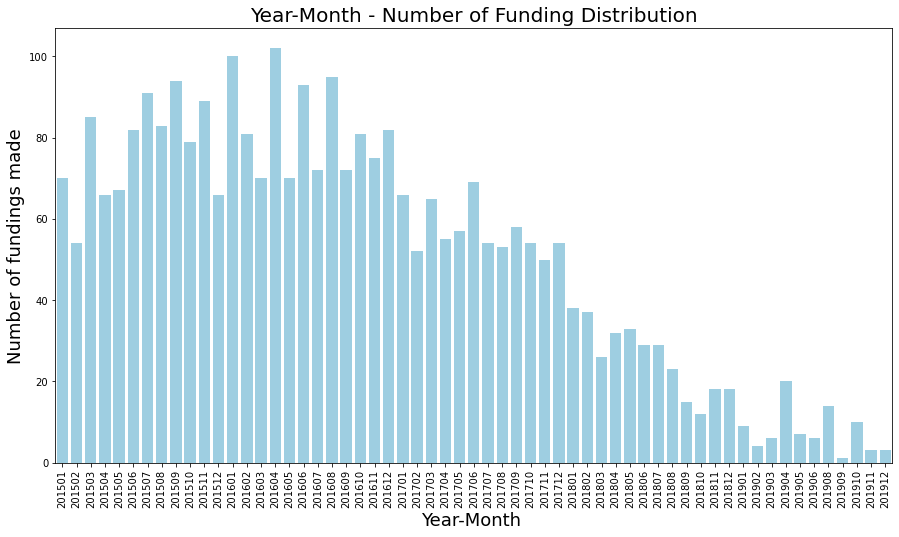

In [15]:
#Plotting funding according to its timeline
plt.figure(figsize=(15,8))
sns.barplot(year_month.index, year_month.values, alpha=0.9,color='skyblue')

plt.xticks(rotation='vertical')
plt.xlabel('Year-Month ', fontsize=18)
plt.ylabel('Number of fundings made', fontsize=18)
plt.title("Year-Month - Number of Funding Distribution", fontsize=20)
plt.show()
#There seems to be no trend in the amount of funding that has been made
#but from 201612 to 201712 the funding has been gradually dropped

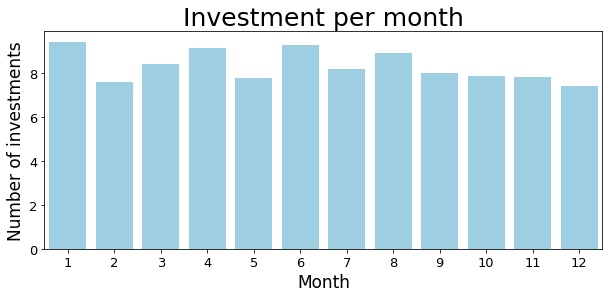

In [16]:
#Checking if there is trend in investment as per month
plt.figure(figsize=(10,4))
sns.barplot(month.index, month.values, alpha=0.9,color='skyblue')
plt.title('Investment per month',fontsize=25)
plt.xlabel('Month',fontsize=17)
plt.ylabel('Number of investments',fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
#There does not seem to be any trend but January and June seems to have the most number of investments

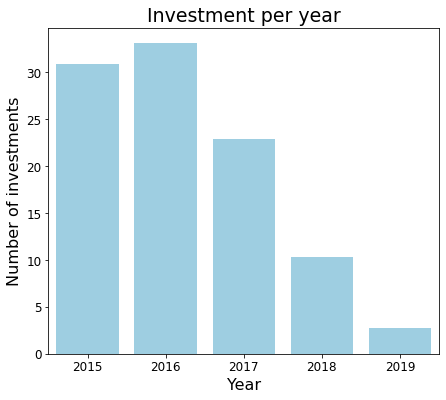

In [17]:
#PLotting funding frequency according to year
plt.figure(figsize=(7,6))
sns.barplot(year.index, year.values, alpha=0.9,color='skyblue')
plt.title('Investment per year',fontsize=19)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of investments',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
#It looks like funding has increased from 2015 to 2016. 
#It makes sense if the funding for 2017 will be greater than 2016
#But we have data for 2017 till october so we cannot really say if the investment has increased after 2017. 
#According to this data, investment has dropped from 39.6% to 18.6% from 2016 to 2017


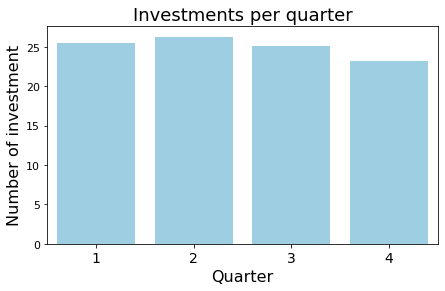

In [18]:
#Plotting funding frequency according to the quarter
plt.figure(figsize=(7,4))
sns.barplot(quarter.index, quarter.values, alpha=0.9,color='skyblue')
plt.title("Investments per quarter",fontsize=18)
plt.xlabel('Quarter',fontsize=16)
plt.ylabel('Number of investment',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=11)
plt.show()
#First 2 quarter seems to have slightly more funding than 3rd and 4th quarter

### 2) AmountInUSD

In [19]:
#Cleaning the target variable
df['AmountinUSD']=(df['AmountinUSD'].str.replace(',','')).astype('float')

In [20]:
#Making a function which gives 95% confidence point and interval, also the range between the lower and upper value.
import scipy.stats as stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    print('Confidence point:',np.around(m,decimals=2))
    print('From:',(np.around(m-h,decimals=2)))
    print('To:',np.around(m+h,decimals=2))
    print('Range:',(np.around((m+h)-(m-h),decimals=2)))
    

#Calculating 95% confidence interval for out target variable
mean_confidence_interval(df['AmountinUSD'].dropna())

Confidence point: 16975983.94
From: 11794357.87
To: 22157610.0
Range: 10363252.13


In [21]:
#Printing confidence interval as per year
for x in df['year'].value_counts().index:
    print(x)
    print('*'*30)
    mean_confidence_interval((df['AmountinUSD'][df['year']==x]).dropna())
    print('\n')

2016
******************************
Confidence point: 6532574.42
From: 4944105.32
To: 8121043.51
Range: 3176938.19


2015
******************************
Confidence point: 13293952.66
From: 9187722.45
To: 17400182.86
Range: 8212460.42


2017
******************************
Confidence point: 22871293.27
From: 8882981.56
To: 36859604.98
Range: 27976623.41


2018
******************************
Confidence point: 19329691.96
From: 12854244.45
To: 25805139.47
Range: 12950895.02


2019
******************************
Confidence point: 82673686.96
From: -15836275.3
To: 181183649.23
Range: 197019924.52




In [22]:
#Printing confidence interval for top all top3 categories
for cols in df.columns[0:6]:
    print(cols)
    for x in df[cols].value_counts()[0:3].index:
        print('*'*30)        

        print(x)
        
        print('*'*30)
        
        mean_confidence_interval((df['AmountinUSD'][df[cols]==x]).dropna())
        
        print('\n')

StartupName
******************************
Swiggy
******************************
Confidence point: 33812500.0
From: 3415400.85
To: 64209599.15
Range: 60794198.3


******************************
Ola Cabs
******************************
Confidence point: 95671428.57
From: -3154541.98
To: 194497399.12
Range: 197651941.1


******************************
UrbanClap
******************************
Confidence point: 12140000.0
From: -901491.99
To: 25181491.99
Range: 26082983.98


IndustryVertical
******************************
Consumer Internet
******************************
Confidence point: 10616441.84
From: 7927665.46
To: 13305218.23
Range: 5377552.77


******************************
Technology
******************************
Confidence point: 7154895.88
From: 5421246.17
To: 8888545.59
Range: 3467299.42


******************************
eCommerce
******************************
Confidence point: 39702642.86
From: -5164579.19
To: 84569864.91
Range: 89734444.1


SubVertical
***********************

In [23]:
#Statistics for Amount of investment
#The amount that is invested seems to be very flexible
print('skewness',df['AmountinUSD'].skew())
print('kurtosis',df['AmountinUSD'].kurtosis())
print('median  ',df['AmountinUSD'].median())
print(df['AmountinUSD'].describe())


skewness 23.47016718470771
kurtosis 666.9921409151466
median   1580000.0
count    2.033000e+03
mean     1.697598e+07
std      1.191319e+08
min      1.600000e+04
25%      4.500000e+05
50%      1.580000e+06
75%      7.600000e+06
max      3.900000e+09
Name: AmountinUSD, dtype: float64


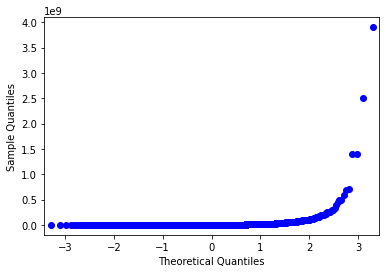

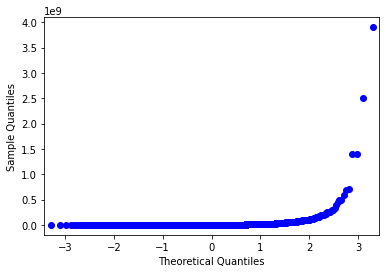

In [24]:
#Checking the distribution for the target variable AmountInUSD
import statsmodels.api as sm
sm.qqplot(df['AmountinUSD'].dropna())

In [25]:
#Analyzing the startup that got the max funding
df[df['AmountinUSD']==1400000000.0]

,StartupName,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,State,month,year,quarter,day,yearmonth
795,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity Round,1.400000e+09,Karnataka,5,2017,2,18,201705
931,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity Round,1.400000e+09,Karnataka,3,2017,1,21,201703


In [26]:
#Analyzing the startup that got the least funding
df[df['AmountinUSD']==16000]

,StartupName,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,State,month,year,quarter,day,yearmonth
2972,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,NaN,1,2015,1,19,201501
2973,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,NaN,1,2015,1,19,201501
2974,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,NaN,1,2015,1,19,201501
2975,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,NaN,1,2015,1,19,201501
2976,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,NaN,1,2015,1,19,201501


#### Before doing eda of categorical variables we will clean the data frame
#### After that we will divide the dataset into 2 different dataframes
#### 1) All the data with no null values of AmountInUSD
#### 1) All the data with only null values of AmountInUSD

In [27]:
#Before splitting the dataset we will first clean the data

### StartupName

In [28]:
#There are many variables where the data is same but the name is different
#First we will lower all the strings
#Later we will personally rename all the variable names
df['StartupName']=df['StartupName'].str.lower()

In [29]:
df['StartupName']=df['StartupName'].replace("practo","practo")
df['StartupName']=df['StartupName'].replace("couponmachine.in","couponmachine")
df['StartupName']=df['StartupName'].replace("olacabs","ola cabs")
df['StartupName']=df['StartupName'].replace("ola","ola cabs")
df['StartupName']=df['StartupName'].replace("olipkart.com","flipkart")
df['StartupName']=df['StartupName'].replace("paytm marketplace","paytm")
df['StartupName'][df['StartupName']=='flipkart.com']='flipkart'

df['StartupName'][df['StartupName']=='oyo']='oyo rooms'

### Industry Vertical

In [30]:
df['IndustryVertical']=df['IndustryVertical'].str.lower()

### Industry Subvertical

In [31]:
df['SubVertical']=df['SubVertical'].str.lower()

### City Location

In [32]:
df['CityLocation']=df['CityLocation'].str.lower().str[0:2]

### Investor Name

In [33]:
df['InvestmentnType']=df['InvestmentnType'].str.split(expand=True)[0].str.lower()

### Investment Type

In [34]:
df['InvestmentnType']=df['InvestmentnType'].str.lower().str[0]

In [35]:
df.head()

,StartupName,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,State,month,year,quarter,day,yearmonth
0,fpl technologies,fintech,financial services,pu,"Matrix Partners India, Sequoia India",m,4500000.0,Maharashtra,5,2019,2,9,201905
1,cashflo,fintech,invoice discounting platform and sme lending m...,mu,SAIF Partners,s,3300000.0,Maharashtra,4,2019,2,9,201904
2,digital f5,"advertising, marketing",digital marketing firm,mu,TIW Private Equity,p,6000000.0,Maharashtra,4,2019,2,9,201904
3,3rdflix,saas,education technology,hy,Exfinity Venture Partners,p,5000000.0,Telangana,4,2019,2,9,201904
4,75f,iot,building automation system,mu,Breakthrough Energy Ventures,s,18000000.0,Maharashtra,4,2019,2,9,201904


In [100]:
df['StartupName'] = df['StartupName'].replace({"Flipkart.com":"Flipkart"})
df['IndustryVertical']=df['IndustryVertical'].replace({"ECommerce":"eCommerce"})
df['IndustryVertical']=df['IndustryVertical'].replace({"ecommerce":"eCommerce"})
df['IndustryVertical']=df['IndustryVertical'].replace({"Ecommerce":"eCommerce"})
df['InvestmentnType']=df['InvestmentnType'].replace({"Crowd dfing":"Crowd dfing"})
df['InvestmentnType']=df['InvestmentnType'].replace({"Seeddfing":"Seed dfing"})
df['InvestmentnType']=df['InvestmentnType'].replace({"PrivateEquity":"Private Equity"})
df['StartupName']=df['StartupName'].replace({"practo":"Practo"})
df['StartupName']=df['StartupName'].replace({"couponmachine.in":"Couponmachine"})
df['StartupName']=df['StartupName'].replace({"Olacabs":"Ola Cabs"})
df['StartupName']=df['StartupName'].replace({"Ola":"Ola Cabs"})
df['Investorname']=df['Investorname'].replace({"Undisclosed investors":"Undisclosed Investors"})
df['Investorname']=df['Investorname'].replace({"Undisclosed Investor":"Undisclosed Investors"})
df['Investorname']=df['Investorname'].replace({"Undisclosed":"Undisclosed Investors"})
df['Investorname']=df['Investorname'].replace({"undisclosed investors":"Undisclosed Investors"})
df['Investorname']=df['Investorname'].replace({"Undisclosed investor":"Undisclosed Investors"})
df['Investorname']=df['Investorname'].replace({" Sequoia Capital":"Sequoia Capital"})
df['Investorname']=df['Investorname'].replace({" Accel Partners":"Accel Partners"})
df['Investorname']=df['Investorname'].replace({" Blume Ventures":"Blume Ventures"})
df['Investorname']=df['Investorname'].replace({" SAIF Partners":"SAIF Partners"})
df['Investorname']=df['Investorname'].replace({" Kalaari Capital":"Kalaari Capital"})

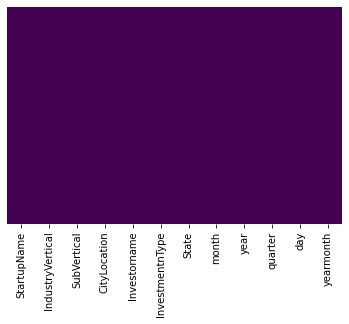

In [36]:
#Now we will create our 2 new dataframes
df_test=df[df['AmountinUSD'].isnull()]

df_test.drop('AmountinUSD',axis=1,inplace=True)

df_test=df_test.dropna()

sns.heatmap(df_test.isnull(),cbar=False,cmap='viridis',yticklabels=False)
#All null values were of year 2015
df_train=(df.dropna(subset=['AmountinUSD']))

In [37]:
df['AmountinUSD'].fillna(df['AmountinUSD'].mode()[0],inplace = True)

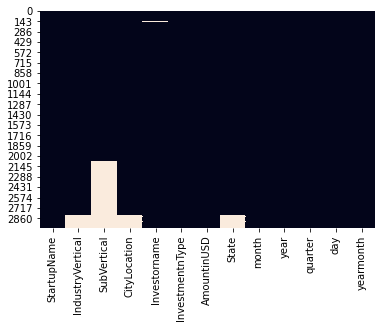

In [38]:
sns.heatmap(df.isnull(), cbar=False)
plt.show();

In [39]:
df['IndustryVertical'].fillna(df['IndustryVertical'].mode()[0],inplace = True)
df['SubVertical'].fillna(df['SubVertical'].mode()[0],inplace = True)
df['CityLocation'].fillna(df['CityLocation'].mode()[0],inplace = True)
df['Investorname'].fillna(df['Investorname'].mode()[0],inplace = True)
df.shape

(2999, 13)

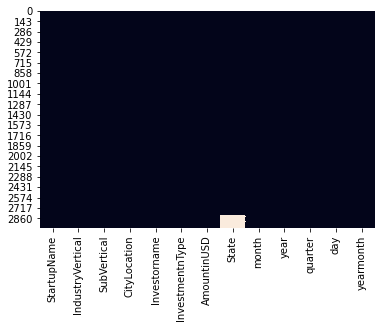

In [40]:
sns.heatmap(df.isnull(), cbar=False)
plt.show();

# EDA of categorical variables

### 1) StartupName


In [41]:
#Statistics for categorical variables
df.describe(include='object')

,StartupName,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,State
count,2999,2999,2999,2999,2999,2999,2825
unique,2315,780,1853,29,2363,11,19
top,ola cabs,consumer internet,online lending platform,ba,Undisclosed Investors,s,Karnataka
freq,13,1113,947,1015,139,1476,842


In [42]:
#Top 10 statups according to amount invested
(df[['StartupName','AmountinUSD']].dropna()).sort_values(by='AmountinUSD',ascending = False).head(10)



,StartupName,AmountinUSD
25,rapido bike taxi,3.900000e+09
616,flipkart,2.500000e+09
931,flipkart,1.400000e+09
795,paytm,1.400000e+09
2603,flipkart,7.000000e+08
2424,paytm,6.800000e+08
153,true north,6.000000e+08
2209,ola cabs,5.000000e+08
2435,snapdeal,5.000000e+08
7,goqii,4.500000e+08


,StartupName,AmountinUSD
25,rapido bike taxi,3.900000e+09
616,flipkart,2.500000e+09
931,flipkart,1.400000e+09
795,paytm,1.400000e+09
2603,flipkart,7.000000e+08
2424,paytm,6.800000e+08
153,true north,6.000000e+08
2209,ola cabs,5.000000e+08
2435,snapdeal,5.000000e+08
7,goqii,4.500000e+08


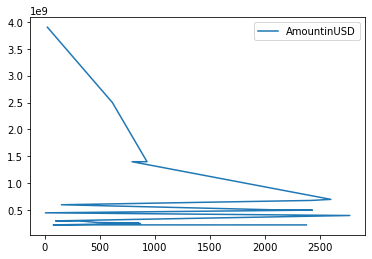

In [43]:
#Making a dataframe of top 20 start up name according to the amount that was invested in them

top20funding=(df[['StartupName','AmountinUSD']].dropna()).sort_values(by='AmountinUSD',ascending = False).head(20)

top20funding.plot()
top20funding


ola cabs               5
flipkart               3
oyo rooms              2
paytm                  2
snapdeal               1
zilingo                1
automation anywhere    1
edelweiss              1
bigbasket              1
goqii                  1
rapido bike taxi       1
true north             1
Name: StartupName, dtype: int64

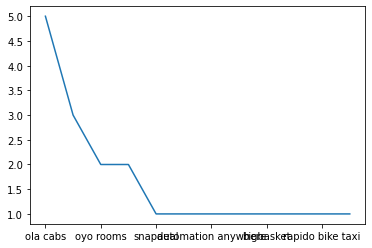

In [44]:
#Counting the frequency of startups in top 20 startups that were funded
top20fundingcount=(df[['StartupName','AmountinUSD']].dropna()).sort_values(by='AmountinUSD',ascending = False).head(20)['StartupName'].value_counts()
top20fundingcount.plot()
top20fundingcount

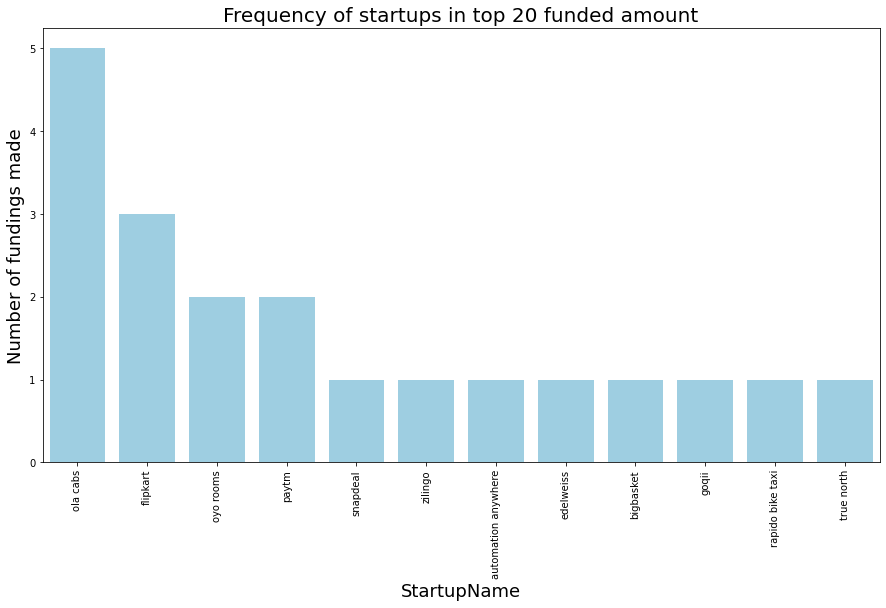

In [45]:
##Plotting the frequency of startups in top 20 startups that were funded

plt.figure(figsize=(15,8))
sns.barplot(top20fundingcount.index, top20fundingcount.values, alpha=0.9,color='skyblue')

plt.xticks(rotation='vertical')
plt.xlabel('StartupName', fontsize=18)
plt.ylabel('Number of fundings made', fontsize=18)
plt.title("Frequency of startups in top 20 funded amount", fontsize=20)
plt.show()



In [46]:
#Creating a new dataframe with StartupName and the amount they got as funding
nameamount=df_train[['StartupName','AmountinUSD']]

In [47]:
#Grouping the dataframe according to StartupName and sorting it out accoring to number of funding they recieved
nameamount=nameamount.groupby('StartupName').sum().sort_values(by='AmountinUSD',ascending=False)

#How much of funding is recieved by how much of startups
np.sum((nameamount/np.sum(nameamount)*100).head(53))

len(nameamount)

53/1268*100

4.17981072555205

#### 70% amount of funding is recieved by 4.1% of startup

### 2) Industry Vertical
#### ● Which industries are favored by investors for funding?


In [48]:
#Percentage of null values in dataframe
len(df[df['IndustryVertical'].isnull()==True])/len(df['IndustryVertical'])*100

0.0

In [49]:
#Industries that recieved funding more than 3 times
df_train['IndustryVertical'].value_counts()[df_train['IndustryVertical'].value_counts()>3]

consumer internet               590
technology                      308
ecommerce                       170
finance                          56
healthcare                       44
e-commerce                       30
logistics                        22
education                        17
food & beverage                  15
ed-tech                          13
it                                8
fintech                           7
fin-tech                          6
edtech                            5
food and beverage                 5
online food delivery              5
hyperlocal handyman services      4
logistics tech                    4
others                            4
health and wellness               4
Name: IndustryVertical, dtype: int64

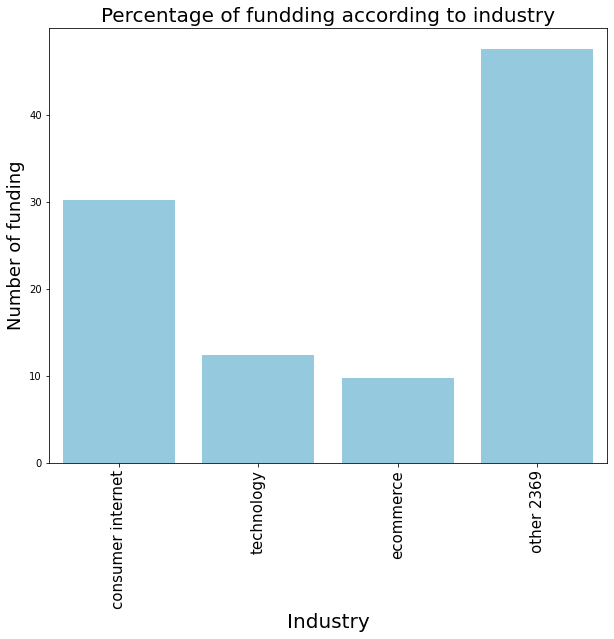

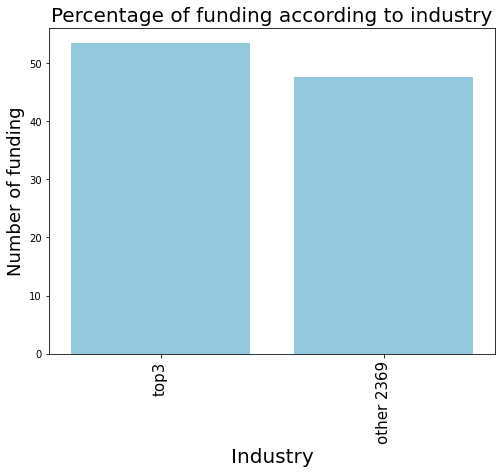

In [50]:
#Top 3 industries with most frequent funding recieved
(df_train['IndustryVertical'].value_counts()/len(df_train['IndustryVertical'])*100)[0:3]

x_barindustry=np.array(['consumer internet','technology','ecommerce','other 2369'])     
y_barindustry=np.array([30.229508,12.393443,9.770492,47.6])

plt.figure(figsize=(10,8))
sns.barplot(x_barindustry,y_barindustry,color='skyblue')
plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('Industry', fontsize=20)
plt.ylabel('Number of funding', fontsize=18)
plt.title("Percentage of fundding according to industry", fontsize=20)

plt.show()

#Comparing investments of top 3 industries vs the rest
x_barindustry_top3=np.array(['top3','other 2369'])     
y_barindustry_top3=np.array([53.4,47.6])


plt.figure(figsize=(8,6))
sns.barplot(x_barindustry_top3,y_barindustry_top3,color='skyblue')
plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('Industry', fontsize=20)
plt.ylabel('Number of funding', fontsize=18)
plt.title("Percentage of funding according to industry", fontsize=20)

plt.show()

In [51]:
#Creating new dataframe with the industry name and amount invested in respective industries
indamount=df_train[['IndustryVertical','AmountinUSD']]

#Grouping the dataframe according to industries and sorting it according to the amount invested
indamount=indamount.groupby('IndustryVertical').sum().sort_values(by='AmountinUSD',ascending=False)

#How much investment is done in how many of industries?
np.sum((indamount/indamount.sum()*100).head(9))

len(indamount)

9/508*100



1.7716535433070866

#### 71.2% of investment is done in 1.7% industries

### 3) City Location
#### ● Do cities play a major role in funding?


In [52]:
#Creating new dataframe which is sorted according to frequency of investments that is allocated as per State
topStatefunded=df_train['State'].value_counts()[df_train['State'].value_counts()>10]

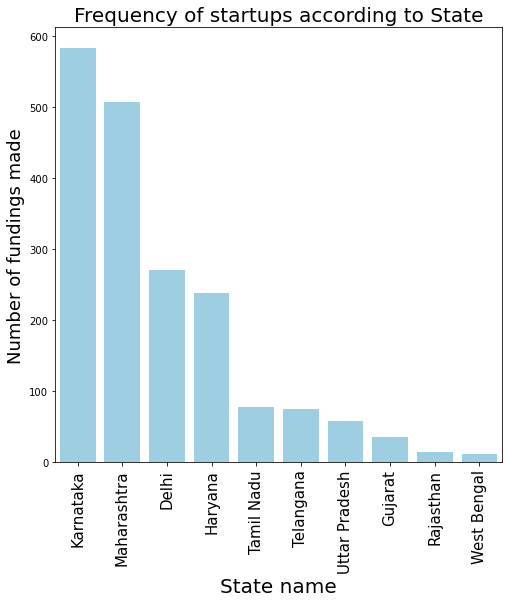

In [53]:
plt.figure(figsize=(8,8))
sns.barplot(topStatefunded.index, topStatefunded.values, alpha=0.9,color='skyblue')

plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('State name', fontsize=20)
plt.ylabel('Number of fundings made', fontsize=18)
plt.title("Frequency of startups according to State", fontsize=20)

plt.show()



In [54]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify

Text(0.5, 1.0, 'Distribution of Startups across Top State')

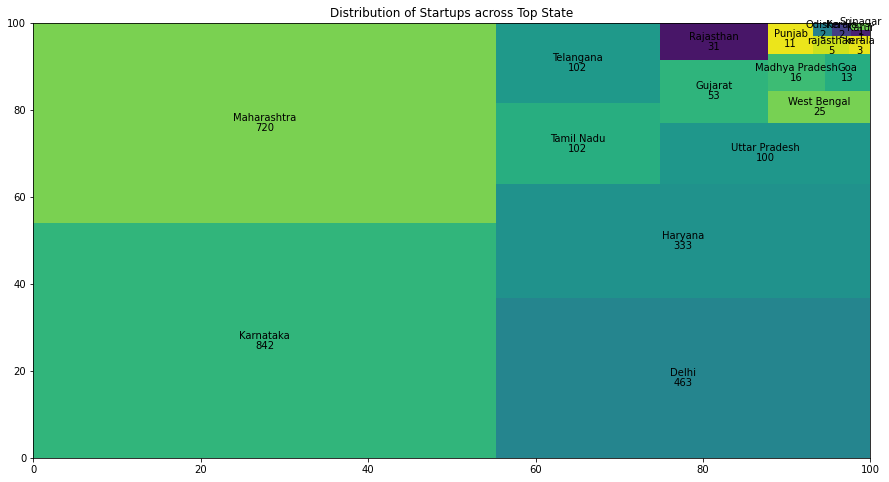

In [55]:

plt.figure(figsize=(15,8))
count = df['State'].value_counts()
squarify.plot(sizes=count.values,label=count.index, value=count.values)
plt.title('Distribution of Startups across Top State')


In [56]:
#Creating new dataframe which is sorted according to frequency of investments that is allocated as per State
topcityfunded=df_train['CityLocation'].value_counts()[df_train['CityLocation'].value_counts()>10]

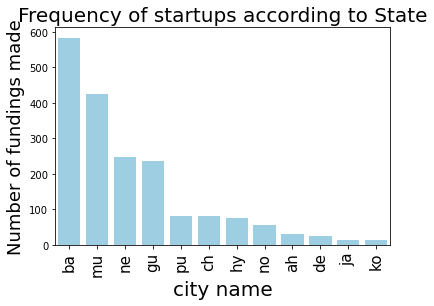

In [57]:
sns.barplot(topcityfunded.index, topcityfunded.values, alpha=0.9,color='skyblue')

plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('city name', fontsize=20)
plt.ylabel('Number of fundings made', fontsize=18)
plt.title("Frequency of startups according to State", fontsize=20)

plt.show()

Text(0.5, 1.0, 'Distribution of Startups across Top State')

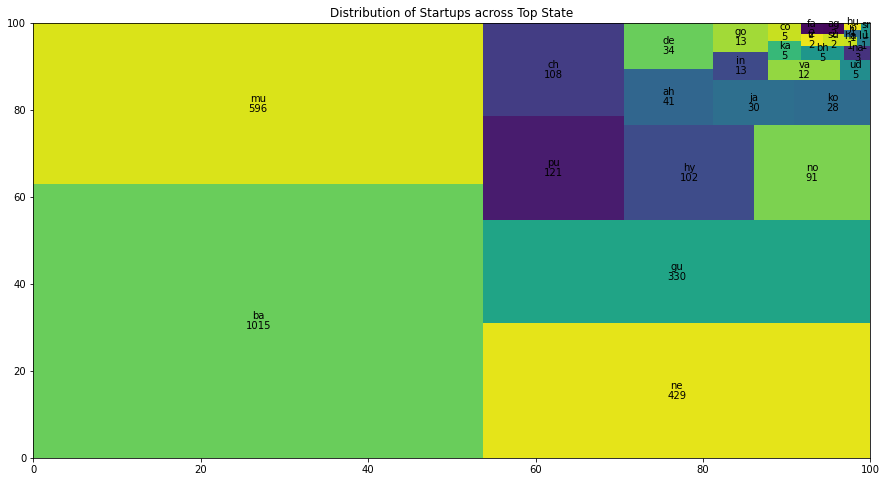

In [58]:

plt.figure(figsize=(15,8))
count = df['CityLocation'].value_counts()
squarify.plot(sizes=count.values,label=count.index, value=count.values)
plt.title('Distribution of Startups across Top State')

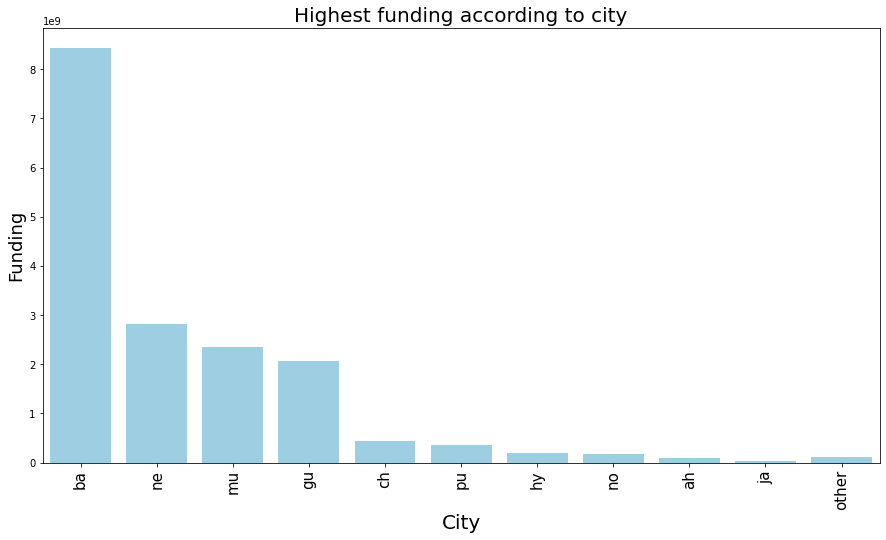

In [59]:
#Creating new dataframe which is sorted according to the amount of investment that is allocated
cityamount=df[['CityLocation','AmountinUSD']].dropna().sort_values(by='AmountinUSD')

cityamount=cityamount.groupby('CityLocation').sum().sort_values(by='AmountinUSD',ascending=False)

x_barcity=np.array(['ba', 'ne', 'mu', 'gu', 'ch', 'pu', 'hy', 'no', 'ah', 'ja','other'])
y_barcity=np.array([8.42297411e+09,
       2.82019750e+09,
       2.35493450e+09,
       2.06902150e+09,
       4.37205000e+08,
       3.66653000e+08,
       1.95362000e+08,
       1.70638000e+08,
       9.81860000e+07,
       3.55600000e+07,
            104791000.0
            ])

plt.figure(figsize=(15,8))
sns.barplot(x_barcity,y_barcity, alpha=0.9,color='skyblue')

plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('City', fontsize=20)
plt.ylabel('Funding', fontsize=18)
plt.title("Highest funding according to city", fontsize=20)

plt.show()



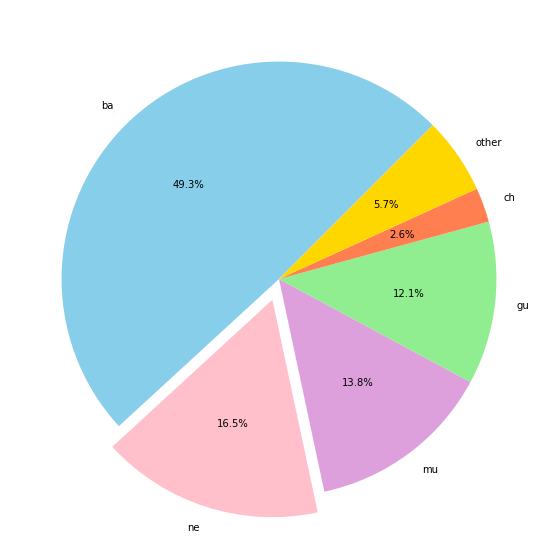

In [60]:
#Creating a pie diagram which shows how much funding is given as per cities
x_piecity=np.array(['ba', 'ne', 'mu', 'gu', 'ch', 'other'])
y_piecity=np.array([8.42297411e+09,
       2.82019750e+09,
       2.35493450e+09,
       2.06902150e+09,
       4.37205000e+08,
      971190000.0
            ])

plt.figure(figsize=(10,10))
plt.pie(y_piecity,labels=(x_piecity),autopct='%1.1f%%',colors=['skyblue','pink','plum','lightgreen','coral','gold'],explode=[0,0.1,0,0,0,0],startangle=45)
plt.rcParams['font.size'] = 16
plt.show()

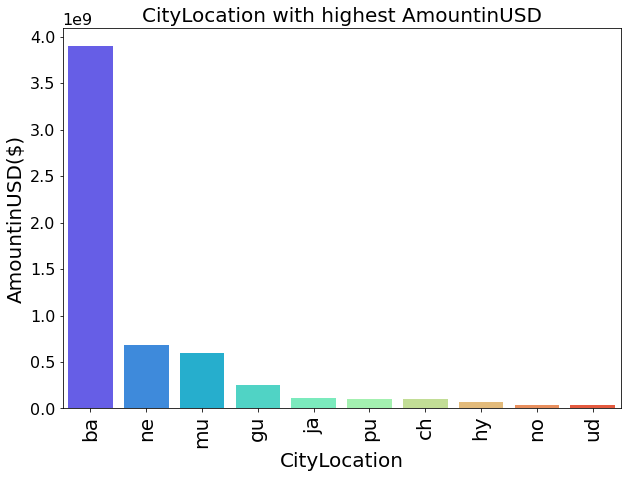

In [61]:
plot_gross1 = pd.DataFrame(df.groupby(['CityLocation'])['AmountinUSD'].max().sort_values(ascending=False)[:10]).reset_index()
plot_gross1 = plot_gross1[plot_gross1['AmountinUSD'] > 0]  
plot_gross1.head(10)
plt.subplots(figsize=(10,7))
sns.barplot(x='CityLocation',y='AmountinUSD',data=plot_gross1,palette='rainbow', )
plt.ylabel('AmountinUSD($)', fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('CityLocation', fontsize=20)
plt.title('CityLocation with highest AmountinUSD', fontsize=20)
plt.show()

In [62]:
#How much investment is done in how many of cities?

(np.sum((cityamount/np.sum(cityamount)*100)[0:4]))

len(cityamount)

4/32*100



12.5

#### 91.7% of investment is done in 12.5% of cities

### 4) Investor Name
#### ● Who are the important investors in the Indian Ecosystem?


In [63]:
#Top 10 investors according to frequency of funding
investorname=df['Investorname'].value_counts().head(10)
investorname

Undisclosed Investors       139
Ratan Tata                   30
Indian Angel Network         23
Kalaari Capital              16
Sequoia Capital              15
Group of Angel Investors     15
Accel Partners               12
Venture Catalysts            11
Brand Capital                11
SAIF Partners                10
Name: Investorname, dtype: int64

In [64]:
#How much does the top 10 investors contribute in funding
np.sum((df_train['Investorname'].value_counts()/len(df_train['Investorname'])*100)[0:10])

9.345794392523366

In [65]:
#How much does the rest of investors contribute in funding
np.sum((df_train['Investorname'].value_counts()/len(df_train['Investorname'])*100)[10:])

89.71962616822428

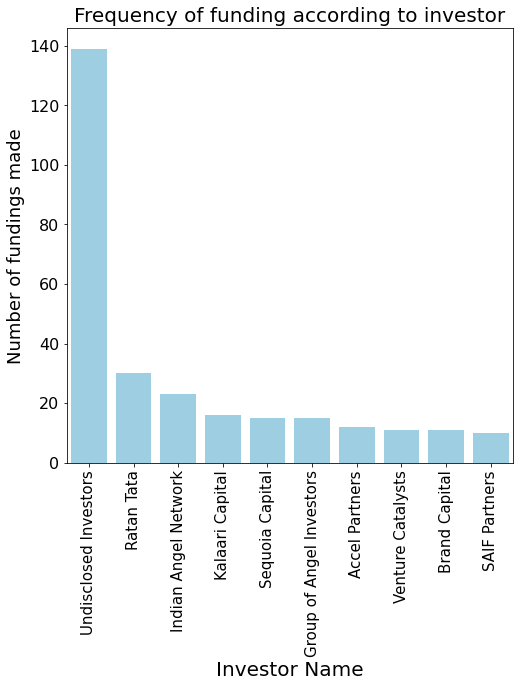

In [66]:
plt.figure(figsize=(8,8))
sns.barplot(investorname.index, investorname.values, alpha=0.9,color='skyblue')

plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('Investor Name', fontsize=20)
plt.ylabel('Number of fundings made', fontsize=18)
plt.title("Frequency of funding according to investor", fontsize=20)

plt.show()



In [67]:
#Creating new data frame with only Investor names and the amount they invested
investoramount=df_train[['Investorname','AmountinUSD']]

In [68]:
investoramount.head(10)

,Investorname,AmountinUSD
0,"Matrix Partners India, Sequoia India",4500000.0
1,SAIF Partners,3300000.0
2,TIW Private Equity,6000000.0
3,Exfinity Venture Partners,5000000.0
4,Breakthrough Energy Ventures,18000000.0
5,Endiya Partners,1000000.0
6,A91 Partners,10000000.0
7,Bennett Coleman and Company Ltd (BCCL),450000000.0
8,"India Quotient, Axilor Ventures",5000000.0
9,SC GG India Mobility Holdings LLC,20000000.0


In [69]:
#Grouping investorname with the amount they have invested
investoramount=investoramount.groupby('Investorname').sum().sort_values(by='AmountinUSD',ascending=False)
investoramount.head(10)

,AmountinUSD
Investorname,
Westbridge Capital,3.900000e+09
Softbank,2.500000e+09
SoftBank Group,1.462000e+09
"Microsoft, eBay, Tencent Holdings",1.400000e+09
Steadview Capital and existing investors,7.000000e+08
"Alibaba Group, Ant Financial",6.800000e+08
"Alibaba, Foxconn, Softbank",5.000000e+08
"Baillie Gifford, Falcon Edge Capital, Tiger Global, SoftBank Group, DST Global, Didi Kuaidi",5.000000e+08
Bennett Coleman and Company Ltd (BCCL),4.500000e+08


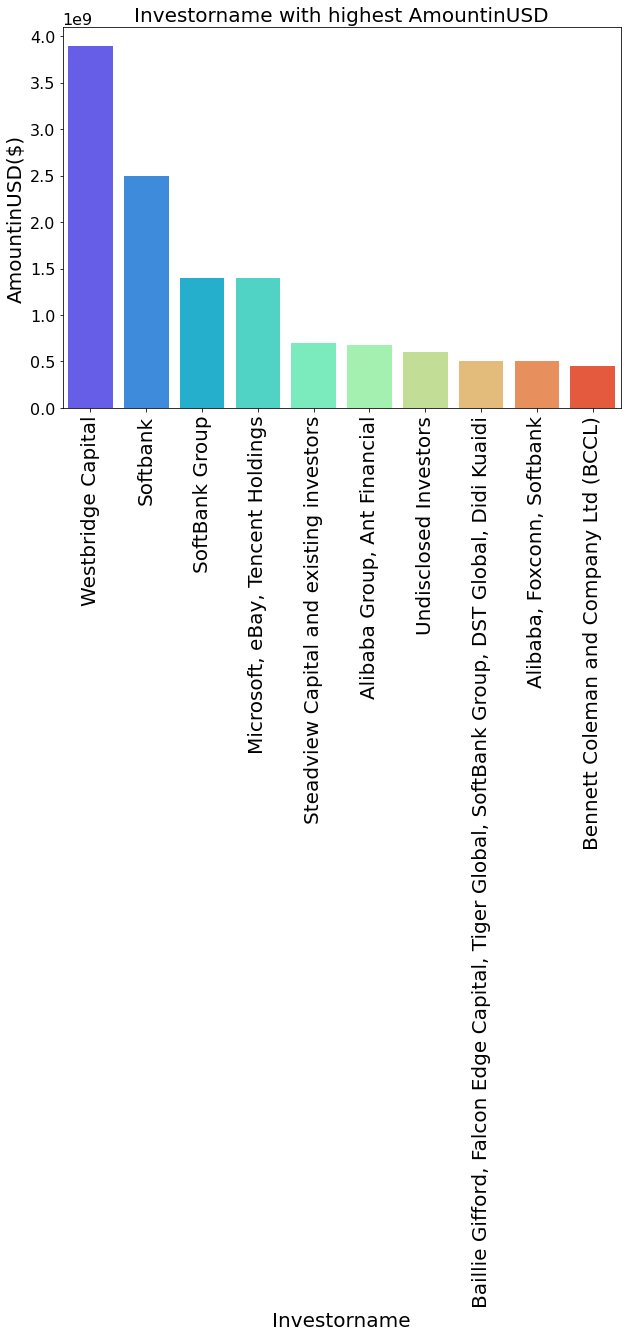

In [70]:
plot_gross = pd.DataFrame(df.groupby(['Investorname'])['AmountinUSD'].max().sort_values(ascending=False)[:10]).reset_index()
plot_gross = plot_gross[plot_gross['AmountinUSD'] > 0]  
plt.subplots(figsize=(10,7))
sns.barplot(x='Investorname',y='AmountinUSD',data=plot_gross,palette='rainbow', )
plt.ylabel('AmountinUSD($)', fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('Investorname', fontsize=20)
plt.title('Investorname with highest AmountinUSD', fontsize=20)
plt.show()

In [71]:
#How much investment is done by how many of investors?
(np.sum((investoramount/np.sum(investoramount)*100)[0:36]))

len(investoramount)

36/703*100

5.120910384068279

#### 70.1% of investment is done by 5.1% of investors

### 5) Subvertical

In [72]:
#Creating new data frame with only Investor names and the amount they invested
subamount=df_train[['SubVertical','AmountinUSD']]

In [73]:
subamount=(subamount.groupby('SubVertical').sum()).sort_values(by='AmountinUSD',ascending=False)
subamount

,AmountinUSD
SubVertical,
bike taxi,3.900000e+09
online marketplace,2.727400e+09
ecommerce marketplace,1.708800e+09
mobile wallet & ecommerce platform,1.460000e+09
private equity firm,6.000000e+08
...,...
audio technology solutions,2.250000e+04
augmented reality solutions,2.250000e+04
mobile email productivity tool,2.250000e+04


In [74]:
#How much investment is done in Subvertical?

np.sum((subamount/np.sum(subamount)*100).head(39))

len(subamount)

39/815*100



4.785276073619632

#### 70.2% of investment is done in 4.7% of subvertical industries

In [75]:
#Grouping the data frame according to StartupNames
group=df_train.groupby('StartupName')

In [76]:
#Sorting the dataframe according to amount of funding and capturing the 4.1% of startup that got 70% of funding
topstartup=group.first().sort_values('AmountinUSD',ascending=False).head(53)

In [77]:
topstartup.head()

,IndustryVertical,SubVertical,CityLocation,Investorname,InvestmentnType,AmountinUSD,State,month,year,quarter,day,yearmonth
StartupName,,,,,,,,,,,,
rapido bike taxi,transportation,bike taxi,ba,Westbridge Capital,s,3.900000e+09,Karnataka,8,2019,3,27,201908
flipkart,ecommerce,online marketplace,ba,Softbank,p,2.500000e+09,Karnataka,11,2017,4,8,201711
true north,finance,private equity firm,mu,NaN,p,6.000000e+08,Maharashtra,8,2018,3,30,201808
goqii,health and wellness,wearable fitness bands,mu,Bennett Coleman and Company Ltd (BCCL),s,4.500000e+08,Maharashtra,4,2019,2,9,201904
bigbasket,consumer internet,online grocery & food store,ba,"Alibaba, Helion Venture Partners, Bessemer Ven...",p,3.000000e+08,Karnataka,1,2018,1,2,201801


In [78]:
#Top frequency of all variables in this top topstartup dataframe
for x in topstartup.columns:
    print(x)
    print('*'*30)
    print(topstartup[x].value_counts()[topstartup[x].value_counts()>1])
    print('\n')

IndustryVertical
******************************
consumer internet     12
finance                7
technology             6
e-commerce             3
ecommerce              3
food and beverages     2
Name: IndustryVertical, dtype: int64


SubVertical
******************************
Series([], Name: SubVertical, dtype: int64)


CityLocation
******************************
mu    19
ba    13
gu     7
pu     4
ne     4
ch     2
Name: CityLocation, dtype: int64


Investorname
******************************
Naspers    2
Name: Investorname, dtype: int64


InvestmentnType
******************************
p    39
s    13
Name: InvestmentnType, dtype: int64


AmountinUSD
******************************
100000000.0    10
60000000.0      4
200000000.0     3
56000000.0      2
75000000.0      2
70000000.0      2
300000000.0     2
150000000.0     2
140000000.0     2
82000000.0      2
Name: AmountinUSD, dtype: int64


State
******************************
Maharashtra    23
Karnataka      13
Haryana         7


In [79]:
#Percentage of top frequency of all variables in top topstartup dataframe
for x in topstartup.columns:
    print(x)
    print('*'*30)
    print((topstartup[x].value_counts()[topstartup[x].value_counts()/len(topstartup[x])*100>2])/len(topstartup[x])*100)
    print('\n')

IndustryVertical
******************************
consumer internet     22.641509
finance               13.207547
technology            11.320755
e-commerce             5.660377
ecommerce              5.660377
food and beverages     3.773585
Name: IndustryVertical, dtype: float64


SubVertical
******************************
Series([], Name: SubVertical, dtype: float64)


CityLocation
******************************
mu    35.849057
ba    24.528302
gu    13.207547
pu     7.547170
ne     7.547170
ch     3.773585
Name: CityLocation, dtype: float64


Investorname
******************************
Naspers    3.773585
Name: Investorname, dtype: float64


InvestmentnType
******************************
p    73.584906
s    24.528302
Name: InvestmentnType, dtype: float64


AmountinUSD
******************************
100000000.0    18.867925
60000000.0      7.547170
200000000.0     5.660377
56000000.0      3.773585
75000000.0      3.773585
70000000.0      3.773585
300000000.0     3.773585
150000000.0    

### Machine Learning

In [80]:
#Dropping the null values
df_train=df_train.dropna()

In [81]:
#As all our features are categorical we need to covert them into numerical type before fitting it into ml algorithm
import feature_engine
from feature_engine import categorical_encoders as ce

In [82]:
#First we will split our data in training and testing dataset
import sklearn as sk 
from sklearn.model_selection import train_test_split

In [83]:
X_df_train=df_train.drop('AmountinUSD',axis=1)
y_df_train=df_train['AmountinUSD']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_df_train, y_df_train, test_size=0.3, random_state=42)

In [85]:
#It is important to check if our training and testing data is in same shape
X_train.shape

(959, 12)

In [86]:
X_test.shape

(412, 12)

In [87]:
#Replaces categories by the mean of the target. 

#For example in the variable colour, if the mean of the target for blue, red
#and grey is 0.5, 0.8 and 0.1 respectively, blue is replaced by 0.5, red by 0.8
#and grey by 0.1.
ohe=ce.MeanCategoricalEncoder()

In [88]:
X_train=ohe.fit_transform(X_train,y_train)

In [89]:
X_test=ohe.fit_transform(X_test,y_test)

In [90]:
#To ease our job we will create a class 
#This class has function based on various machine learning algorithm
#We are using 5 algorithms which are as follows
#1) Logistic Regression
#2) Ada Boost Regressor
#3) Decision Tree Regressor
#4) Random Forest Regressor
#5) K nearest neighbor Regressor
#
#The specific function when called will do the following:-
#1) Fit the training data
#2) Predict the training data
#3) Predict the testing data
#4) Give output as r2 score, mae and mse for training as well as testing data. 

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# to evaluate the models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error




class selmod():    
    def linr(x_tra,y_tra,x_tes,y_tes):
        print('Linear Regression')
        print('\n')
        lr=LinearRegression()
        lr.fit(x_tra,y_tra)
        
        print('Training Validation','\n')
        predtlr=lr.predict(x_tra)
        print('R2: ','\n',r2_score(y_tra,predtlr))
        print('\n')
        print('mae:',mean_absolute_error(y_tra,predtlr))
        print('\n')
        print('mse:',mean_squared_error(y_tra,predtlr))

        print('*'*80)
        
        print('Testing Validation')
        print('\n')
        predlr=lr.predict(x_tes)
        print('R2: ','\n',r2_score(y_tes,predlr))
        print('\n')
        print('mae:',mean_absolute_error(y_tes,predlr))
        print('\n')
        print('mse:',mean_squared_error(y_tes,predlr))
        print('*'*80)
        
    def dectree(x_tra,y_tra,x_tes,y_tes):
        print('Decision Tree Regressor')
        print('\n')
        dt=DecisionTreeRegressor()
        dt.fit(x_tra,y_tra)
        
        print('Training Validation','\n')
        predtdc=dt.predict(x_tra)
        print('R2: ','\n',r2_score(y_tra,predtdc))
        print('\n')
        print('mae:',mean_absolute_error(y_tra,predtdc))
        print('\n')
        print('mse:',mean_squared_error(y_tra,predtdc))
        print('*'*80)
        
        print('Testing Validation')
        print('\n')
        preddc=dt.predict(x_tes)
        print('R2: ','\n',r2_score(y_tes,preddc))
        print('\n')
        print('mae:',mean_absolute_error(y_tes,preddc))
        print('\n')
        print('mse:',mean_squared_error(y_tes,preddc))
        print('*'*80)
    
    def ranfo(x_tra,y_tra,x_tes,y_tes):
        print('Random Forest Regressor')
        print('\n')
        rf=RandomForestRegressor()
        rf.fit(x_tra,y_tra)
        
        print('Training Validation','\n')
        predtrf=rf.predict(x_tra)
        print('R2: ','\n',r2_score(y_tra,predtrf))
        print('\n')
        print('mae:',mean_absolute_error(y_tra,predtrf))
        print('\n')
        print('mse:',mean_squared_error(y_tra,predtrf))
        print('*'*80)
        
        print('Testing Validation')
        print('\n')
        predrf=rf.predict(x_tes)
        print('R2: ','\n',r2_score(y_tes,predrf))
        print('\n')
        print('mae:',mean_absolute_error(y_tes,predrf))
        print('\n')
        print('mse:',mean_squared_error(y_tes,predrf))
        print('*'*80)
    
    def ada(x_tra,y_tra,x_tes,y_tes):
        print('Ada Boost Regressor')
        print('\n')
        ad=AdaBoostRegressor()
        ad.fit(x_tra,y_tra)
        
        print('Training Validation','\n')
        predtad=ad.predict(x_tra)
        print('R2: ','\n',r2_score(y_tra,predtad))
        print('\n')
        print('mae:',mean_absolute_error(y_tra,predtad))
        print('\n')
        print('mse:',mean_squared_error(y_tra,predtad))
        print('*'*80)
        
        print('Testing Validation')
        print('\n')
        predad=ad.predict(x_tes)
        print('R2: ','\n',r2_score(y_tes,predad))
        print('\n')
        print('mae:',mean_absolute_error(y_tes,predad))
        print('\n')
        print('mse:',mean_squared_error(y_tes,predad))
        print('*'*80)
    
    def kneigh(x_tra,y_tra,x_tes,y_tes):
        print('KNN Regressor')
        print('\n')
        knn=KNeighborsRegressor()
        knn.fit(x_tra,y_tra)
        
        print('Training Validation','\n')
        predtknn=knn.predict(x_tra)
        print('R2: ','\n',r2_score(y_tra,predtknn))
        print('\n')
        print('mae:',mean_absolute_error(y_tra,predtknn))
        print('\n')
        print('mse:',mean_squared_error(y_tra,predtknn))
        print('*'*80)
        
        print('Testing Validation')
        print('\n')
        predknn=knn.predict(x_tes)
        print('R2: ','\n',r2_score(y_tes,predknn))
        print('\n')
        print('mae:',mean_absolute_error(y_tes,predknn))
        print('\n')
        print('mse:',mean_squared_error(y_tes,predknn))
        print('*'*80)

In [91]:
#Linear Regression
selmod.linr(X_train,y_train,X_test,y_test)

Linear Regression


Training Validation 

R2:  
 0.9785753582335476


mae: 1936417.2384949594


mse: 70315398227323.336
********************************************************************************
Testing Validation


R2:  
 0.9643533082096016


mae: 5833853.183893539


mse: 2027299608091224.2
********************************************************************************


In [92]:
#Decision Tree
selmod.dectree(X_train,y_train,X_test,y_test)

Decision Tree Regressor


Training Validation 

R2:  
 1.0


mae: 0.0


mse: 0.0
********************************************************************************
Testing Validation


R2:  
 0.6364742801893091


mae: 13746521.89


mse: 2.0674444451583076e+16
********************************************************************************


In [93]:
#Random Forest
selmod.ranfo(X_train,y_train,X_test,y_test)

Random Forest Regressor


Training Validation 

R2:  
 0.9418762200400325


mae: 1233500.2615451512


mse: 190761496920897.16
********************************************************************************
Testing Validation


R2:  
 0.5143929706938098


mae: 16129836.482920876


mse: 2.7617455947593852e+16
********************************************************************************


In [94]:
#KNN 
selmod.kneigh(X_train,y_train,X_test,y_test)

KNN Regressor


Training Validation 

R2:  
 0.7484069835362169


mae: 2590271.9216016685


mse: 825725038332520.9
********************************************************************************
Testing Validation


R2:  
 0.29495648618581405


mae: 18976846.134883497


mse: 4.009725355854079e+16
********************************************************************************


In [95]:
#Ada Boost
selmod.ada(X_train,y_train,X_test,y_test)


Ada Boost Regressor


Training Validation 

R2:  
 0.9843648875283723


mae: 4735932.74648046


mse: 51314237678081.766
********************************************************************************
Testing Validation


R2:  
 0.6360157353548819


mae: 17666732.739650395


mse: 2.070052282566033e+16
********************************************************************************


In [96]:
#For this dataset Linear Regression is the best model where our testing accuracy is 0.976 and training accuracy is 0.960


In [97]:
import pickle

pickle.dump(selmod.ranfo, open('ranf.pkl','wb'))

#pickle.dump(ranf_fit,open('randomforest.pkl', 'wb'))

pickle.dump(selmod.linr,open('linear.pkl','wb'))

#pickle.dump(best_random_grid,open('randomizedsearch.pkl','wb'))